In [ ]:
# -*- coding: utf-8 -*-
# Indentation: Jupyter Notebook

'''
sklearn exploration
'''

__version__ = 1.0
__author__ = "Sourav Raj"
__author_email__ = "souravraj.iitbbs@gmail.com"


In [1]:
from sklearn.datasets import load_iris
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
iris = load_iris()

In [3]:
x=iris.data
y=iris.target

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x ,y ,random_state=1)

In [5]:
y_train.shape

(112L,)

In [6]:
x_test.shape

(38L, 4L)

In [7]:
knn = KNeighborsClassifier(n_neighbors=3)

In [8]:
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [9]:
y_pred = knn.predict(x_test)

In [10]:
metrics.accuracy_score (y_test, y_pred)

1.0

In [11]:
#simulate splitting a dataset of 25 observation into 5 folds
from sklearn.cross_validation import KFold
kf= KFold(25, n_folds=5, shuffle=False)

In [12]:
kf

sklearn.cross_validation.KFold(n=25, n_folds=5, shuffle=False, random_state=None)

In [13]:
for iteration, data in enumerate(kf, start=1):
    print('{:^9}{}{:^25}').format(iteration, data[0], data[1])

    1    [ 5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]       [0 1 2 3 4]       
    2    [ 0  1  2  3  4 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]       [5 6 7 8 9]       
    3    [ 0  1  2  3  4  5  6  7  8  9 15 16 17 18 19 20 21 22 23 24]    [10 11 12 13 14]     
    4    [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 20 21 22 23 24]    [15 16 17 18 19]     
    5    [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]    [20 21 22 23 24]     


In [14]:
#parameteer tuning. select best tuning parameters for KNN

from sklearn.cross_validation import cross_val_score


In [15]:
knn = KNeighborsClassifier(n_neighbors=5)

In [16]:
scores = cross_val_score(knn, x, y, cv=10, scoring='accuracy')

In [17]:
scores

array([ 1.        ,  0.93333333,  1.        ,  1.        ,  0.86666667,
        0.93333333,  0.93333333,  1.        ,  1.        ,  1.        ])

In [18]:
scores.mean()

0.96666666666666679

In [22]:
# search for an optional value of k for KNN
k_range = range(1,31)
k_scores = []
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x, y, cv =10, scoring='accuracy')
    k_scores.append(scores.mean())
print k_scores

[0.95999999999999996, 0.95333333333333337, 0.96666666666666656, 0.96666666666666656, 0.96666666666666679, 0.96666666666666679, 0.96666666666666679, 0.96666666666666679, 0.97333333333333338, 0.96666666666666679, 0.96666666666666679, 0.97333333333333338, 0.98000000000000009, 0.97333333333333338, 0.97333333333333338, 0.97333333333333338, 0.97333333333333338, 0.98000000000000009, 0.97333333333333338, 0.98000000000000009, 0.96666666666666656, 0.96666666666666656, 0.97333333333333338, 0.95999999999999996, 0.96666666666666656, 0.95999999999999996, 0.96666666666666656, 0.95333333333333337, 0.95333333333333337, 0.95333333333333337]


In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

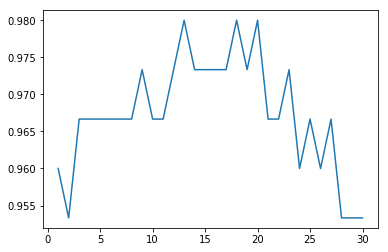

In [26]:
plt.plot(k_range,k_scores)

select best Model Selection using Cross validation

In [27]:
knn = KNeighborsClassifier(n_neighbors=20)

In [28]:
print cross_val_score(knn, x, y, cv=10, scoring='accuracy').mean()

0.98


In [29]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [30]:
print cross_val_score(logreg, x, y, cv =10, scoring='accuracy').mean()

0.953333333333


feature selection using cross validation

In [32]:
import pandas as pd
import numpy as np


In [37]:
data = pd.read_csv("http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv", index_col=0)

In [38]:
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [39]:
feature_cols = ['TV', 'Radio', 'Newspaper']
x=data[feature_cols]

In [40]:
y=data.Sales

In [42]:
from sklearn.linear_model import LinearRegression

In [43]:
lr= LinearRegression()

In [44]:
scores = cross_val_score(lr, x,y, cv =10, scoring='mean_squared_error')

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\site-pa

In [45]:
print scores

[-3.56038438 -3.29767522 -2.08943356 -2.82474283 -1.3027754  -1.74163618
 -8.17338214 -2.11409746 -3.04273109 -2.45281793]


In [46]:
mse_scores = -scores

In [47]:
rmse_scores = np.sqrt(mse_scores)

In [48]:
rmse_scores

array([ 1.88689808,  1.81595022,  1.44548731,  1.68069713,  1.14139187,
        1.31971064,  2.85891276,  1.45399362,  1.7443426 ,  1.56614748])

In [49]:
rmse_scores.mean()

1.6913531708051792

In [50]:
feature_cols = ['TV', 'Radio']

In [51]:
x=data[feature_cols]

In [56]:
np.sqrt(-1*cross_val_score(lr,x,y, cv=10, scoring='mean_squared_error')).mean()

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\site-pa

1.6796748419090766